In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

595


In [3]:
#create data frame and add empty columns
weather_df = pd.DataFrame({'City':cities})
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['MaxTemp'] = ""
weather_df['Humidity'] = ""
weather_df['Cloudiness'] = ""
weather_df['WindSpeed'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""


In [4]:
# Set units to imperial
units = 'imperial'

# Iterate over the rows in the df and fill the columns
print("Beginning data retrieval...")
print("-------------------------")
for index, row in weather_df.iterrows():
    base_url = "https://api.openweathermap.org/data/2.5/weather?" 

    city = row['City']
    
    target_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
    
    response = requests.get(target_url).json() 

    time.sleep(1)
    
    try:
        print(f"Processing record {index}|{city}")
        
        weather_df.loc[index,'Lat'] = response['coord']['lat']
        weather_df.loc[index,'Lng'] = response['coord']['lon']
        weather_df.loc[index,'MaxTemp'] = response['main']['temp_max']
        weather_df.loc[index,'Humidity'] = response['main']['humidity']
        weather_df.loc[index,'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index,'WindSpeed'] = response['wind']['speed']
        weather_df.loc[index,'Country'] = response['sys']['country']
        weather_df.loc[index,'Date'] = response['dt']
        
    except:
        #weather_df.loc[index,'City'] = ""
        print(f"{city} not found. Skipping...")
        
print(f'All finished!')

Beginning data retrieval...
-------------------------
Processing record 0|tawnat
tawnat not found. Skipping...
Processing record 1|riyadh
Processing record 2|anchorage
Processing record 3|kazerun
Processing record 4|mar del plata
Processing record 5|ushuaia
Processing record 6|vardo
Processing record 7|bambanglipuro
Processing record 8|azangaro
Processing record 9|sao joao da barra
Processing record 10|puerto ayora
Processing record 11|qaanaaq
Processing record 12|rikitea
Processing record 13|yellowknife
Processing record 14|nouadhibou
Processing record 15|xacmaz
Processing record 16|aswan
Processing record 17|rostaq
rostaq not found. Skipping...
Processing record 18|albany
Processing record 19|bambous virieux
Processing record 20|berlevag
Processing record 21|burica
burica not found. Skipping...
Processing record 22|thompson
Processing record 23|constitucion
Processing record 24|tasiilaq
Processing record 25|nabire
Processing record 26|jamestown
Processing record 27|parakai
Processing

Processing record 240|witbank
Processing record 241|ambon
Processing record 242|nalut
Processing record 243|mehamn
Processing record 244|banda aceh
Processing record 245|bara
Processing record 246|utinga
Processing record 247|atasu
Processing record 248|acajutla
Processing record 249|koster
Processing record 250|soteapan
Processing record 251|shimoda
Processing record 252|marsh harbour
Processing record 253|huangcun
Processing record 254|portland
Processing record 255|krasnyy chikoy
Processing record 256|pangnirtung
Processing record 257|nogliki
Processing record 258|bratsk
Processing record 259|medicine hat
Processing record 260|amderma
amderma not found. Skipping...
Processing record 261|afmadu
afmadu not found. Skipping...
Processing record 262|husavik
Processing record 263|santa vitoria do palmar
Processing record 264|nuuk
Processing record 265|aripuana
Processing record 266|puerto narino
Processing record 267|clyde river
Processing record 268|bundaberg
Processing record 269|fort n

Processing record 478|mayo
Processing record 479|grindavik
Processing record 480|camacha
Processing record 481|saint-augustin
Processing record 482|sumbawa
sumbawa not found. Skipping...
Processing record 483|northam
Processing record 484|rabak
Processing record 485|beloha
Processing record 486|grand gaube
Processing record 487|beringovskiy
Processing record 488|norsup
Processing record 489|westport
Processing record 490|touros
Processing record 491|shatalovo
Processing record 492|contamana
Processing record 493|manggar
Processing record 494|antibes
Processing record 495|saryshagan
saryshagan not found. Skipping...
Processing record 496|hrubieszow
Processing record 497|along
Processing record 498|kargopol
Processing record 499|hoquiam
Processing record 500|barranca
Processing record 501|ust-nera
Processing record 502|kaeo
Processing record 503|oksfjord
Processing record 504|cruzeiro do sul
Processing record 505|kernersville
Processing record 506|kangaatsiaq
Processing record 507|nouakc

In [5]:
# Replace empty column spaces with NaNs
weather_df.replace('', np.nan, inplace=True)

In [6]:
# Drop rows with NaNs
weather_df = weather_df.dropna()

In [7]:
# Save DataFrame to csv file
weather_df.to_csv(output_data_file)

# Display DataFrame
weather_df.head()

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
1,riyadh,24.6877,46.7219,55.40,44.0,0.0,3.02,SA,1.613011e+09
2,anchorage,61.2181,-149.9003,17.60,67.0,75.0,5.75,US,1.613012e+09
3,kazerun,29.6195,51.6541,55.22,40.0,100.0,0.87,IR,1.613012e+09
4,mar del plata,-38.0023,-57.5575,68.00,83.0,90.0,16.11,AR,1.613011e+09
5,ushuaia,-54.8000,-68.3000,66.20,45.0,40.0,13.80,AR,1.613012e+09


In [8]:
# Convert to floats
weather_df.loc[:,"Lat"] = weather_df["Lat"].astype('float')
weather_df.loc[:,"Lng"] = weather_df["Lng"].astype('float')
weather_df.loc[:,"MaxTemp"] = weather_df["MaxTemp"].astype('float')
weather_df.loc[:,"Humidity"] = weather_df["Humidity"].astype('float')
weather_df.loc[:,"Cloudiness"] = weather_df["Cloudiness"].astype('float')
weather_df.loc[:,"WindSpeed"] = weather_df["WindSpeed"].astype('float')
weather_df.loc[:,"Date"] = weather_df["Date"].astype('float')


In [9]:
# Subse dataframe for summary statistics
summary_stats = weather_df[['Lat','Lng','MaxTemp','Humidity','Cloudiness','WindSpeed','Date']]
summary_stats.describe(include='all')

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.724508,15.611340,47.501897,73.801105,52.616943,7.369411,1.613012e+09
std,34.026162,90.606257,33.132256,19.576443,40.550827,5.534290,3.276096e+02
min,-54.800000,-179.166700,-36.400000,15.000000,0.000000,0.360000,1.613011e+09
25%,-9.046650,-64.300000,21.990000,64.000000,4.000000,3.440000,1.613012e+09
50%,25.133300,20.134700,59.000000,79.000000,62.000000,6.040000,1.613012e+09
75%,50.041750,93.245400,74.720000,88.000000,93.000000,9.930000,1.613012e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,43.730000,1.613012e+09


In [10]:
# Remove cities where humidity is more than 100%
weather_df = weather_df.loc[weather_df['Humidity'] <= 100]

In [11]:
# Summary stats for cities with humidity less than or equal to 100%
summary_stats.describe(include='all')

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.724508,15.611340,47.501897,73.801105,52.616943,7.369411,1.613012e+09
std,34.026162,90.606257,33.132256,19.576443,40.550827,5.534290,3.276096e+02
min,-54.800000,-179.166700,-36.400000,15.000000,0.000000,0.360000,1.613011e+09
25%,-9.046650,-64.300000,21.990000,64.000000,4.000000,3.440000,1.613012e+09
50%,25.133300,20.134700,59.000000,79.000000,62.000000,6.040000,1.613012e+09
75%,50.041750,93.245400,74.720000,88.000000,93.000000,9.930000,1.613012e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,43.730000,1.613012e+09


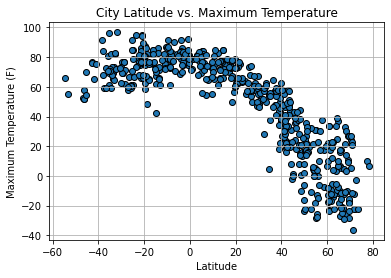

In [12]:
# Max Temp vs. latitude 
plt.scatter(weather_df['Lat'], weather_df['MaxTemp'], edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('City Latitude vs. Maximum Temperature')
plt.grid()
plt.savefig('../output_data/fig1.png')
plt.show()

This scatter plot shows the relationship between latitude and temperature. As latitude approaches 0, the temperature increases.
From zero to 80, the temperature decreases. This plot looks curve-linear in shape. 

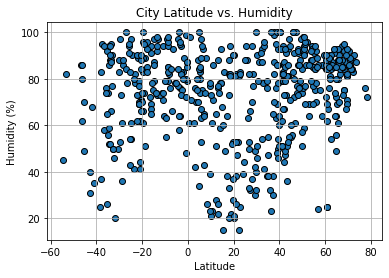

In [13]:
# Humidity vs. latitude
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.savefig('../output_data/fig2.png')
plt.show()

This scatter plot shows the relationship between latitude and humidity. The points are evenly distributed throughout all latitudes and it doesn't appear that humidity is affected by latidude.

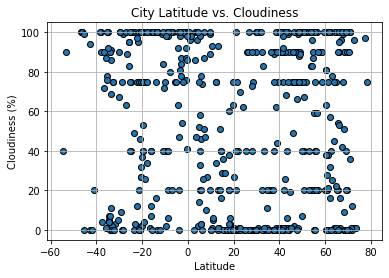

In [14]:
# Cloudiness vs latitude
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.savefig('../output_data/fig3.png')
plt.show()

This scatter plot shows the relationship between latitude and cloudiness. There does not appear to be any correlation at all.

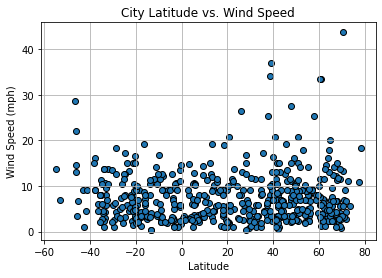

In [15]:
# Wind Speed vs. latitude
plt.scatter(weather_df['Lat'], weather_df['WindSpeed'], edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.savefig('../output_data/fig4.png')
plt.show()

This is a scatter plot of latitude and wind speed. The horizontal look of these points would indicate no correlation.

In [16]:
# Group DataFrame into northern and southern hemispheres
northern_hem = weather_df.loc[weather_df['Lat'] >= 0]
southern_hem = weather_df.loc[weather_df['Lat'] < 0]
southern_hem.head()

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
4,mar del plata,-38.0023,-57.5575,68.00,83.0,90.0,16.11,AR,1.613011e+09
5,ushuaia,-54.8000,-68.3000,66.20,45.0,40.0,13.80,AR,1.613012e+09
7,bambanglipuro,-7.9500,110.2833,82.81,76.0,80.0,9.15,ID,1.613012e+09
8,azangaro,-14.9167,-70.2167,42.67,87.0,100.0,2.80,PE,1.613011e+09
9,sao joao da barra,-21.6403,-41.0511,74.55,89.0,95.0,2.26,BR,1.613011e+09


The r-value is -0.8739825857938448.


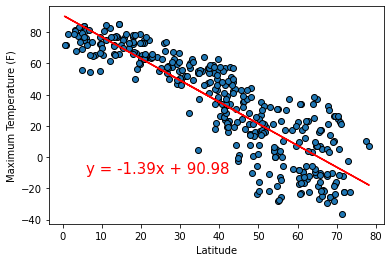

In [17]:
# Max Temp vs. latitude, northern hemisphere

# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.show()

The r-value is 0.3948172511079633.


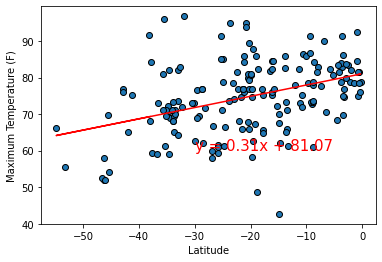

In [18]:
# Max Temp vs. latitude, southern hemisphere

# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.show()

The linear regression for latitude and temperature in the northern hemisphere shows a strong, negative relationship. With an r-value of -.87, we can say that temperature is clearly associated with latitude. For the sourthern hemisphere, we have a weak, positive relationship between latitude and temperature. The difference in strength between northern and southern hemishphere could be that the range of latiude is smaller for the southern hemisphere. The seasonally cold temperatures in the north could also play a role in the difference. We can definitely see that the temperature is warmer the closer we are to 0 latiude. 

The r-value is 0.3385145737477982.


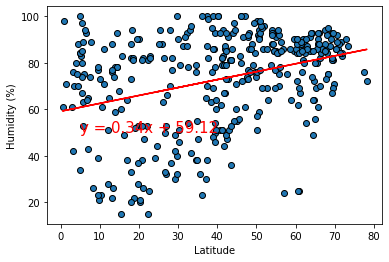

In [19]:
# Humidity vs. latitude, northern hemisphere

# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The r-value is 0.31456629559396976.


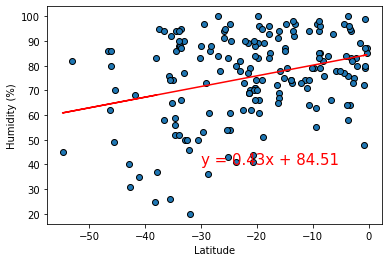

In [20]:
# Humidity vs. latitude, southern hemisphere

# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The linear regression for humidity vs. latitude is positive for both northern and souther hemispheres, however they have weak correlation. There is not much evidence of association between latitude and humidity.

The r-value is 0.12539716155694147.


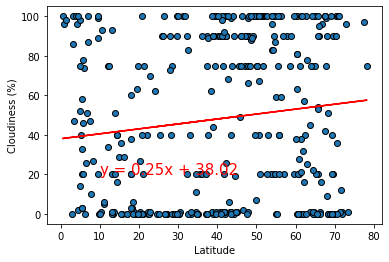

In [21]:
# Cloudiness vs. latitude, northern hemishphere

# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The r-value is 0.160290880775217.


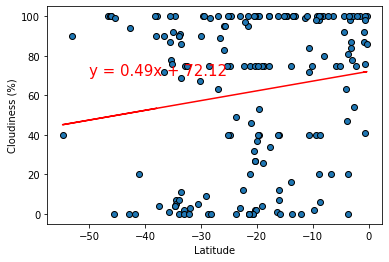

In [22]:
# Cloudiness vs. latitude, southern hemisphere

# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The linear regression for cloudiness vs. latitude is positive for both northern and southern hemispheres, however it is very to weak to no correlation. With r-values of .13 and .16 respectively, there is very little evidence that cloudiness is associated with latitude.

The r-value is 0.06713004024539047.


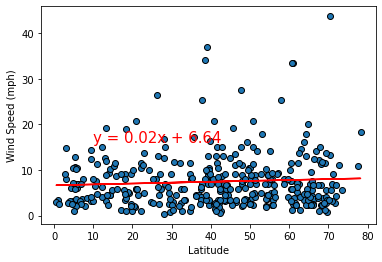

In [23]:
# Wind Speed vs. latitude, northern hemisphere

# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,16),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The r-value is -0.20340917719669288.


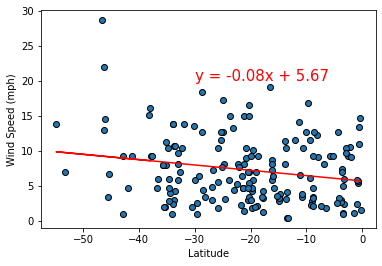

In [24]:
# Wind Speed vs. latitude, southern hemisphere

# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

With an r-value of .07, there is no correlation between latitude and wind speed in the northern hemishphere. In the southern hemisphere, an r-value of -.2 shows a negative, very weak to no correlation between latitude and wind speed. There is little to no evidence that wind speed is associated with latitude.